---

Brownian bridge

---

In [3]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from stochastic.brownian import simulate_brownian_bridge, simulate_brownian_motion

sns.set_theme("talk")
mpl.rcParams["figure.figsize"] = (8, 6)

### Simulate Brownian bridge

Let $B_t$ be a standard Brownian motion. Fix $t_0 < t_1$ and 
define $a:=B_{t_0}$ and $b:=B_{t_1}$.

The Brownian bridge on $[t_0,t_1]$ from $a$ to $b$ is the process:

$$
    X_t := B_t - \frac{t - t_0}{t_1 - t_0} (B_{t_1} - B_{t_0}), 
    \qquad t \in [t_0,t_1].
$$

Equivalently, $X_t$ is the process $B_t$ conditioned on the event 
$B_{t_0} = a$ and $B_{t_1} = b$. Thus, $X_t$ is a Gaussian process with:

- $X_{t_0} = a$ and $X_{t_1} = b$ almost surely,
- the conditional mean 
$$
    \mathbb{E}[X_t | B_{t_0} = a, B_{t_1} = b] = a + \frac{t - t_0}{t_1 - t_0} (b - a),
$$
- the conditional variance
$$
    \text{Var}(X_t | B_{t_0} = a, B_{t_1} = b) 
    = \frac{(t - t_0)(t_1 - t)}{t_1 - t_0}, 
$$

In [6]:
SEED = 1234  # set seed for reproducibility

In [ ]:
T = 0.5
n_steps = 400
n_mc = 1

In [26]:
tab_t, brownian_paths = simulate_brownian_motion(
    T=T, n_steps=n_steps, n_mc=n_mc, seed=SEED
)

In [33]:
a = -0.5  # starting point of the bridge
b = 1.5  # ending point of the bridge

tab_t, brownian_bridge_paths = simulate_brownian_bridge(
    a=a, b=b, t0=0, t1=T, n_steps=n_steps, n_mc=n_mc, seed=SEED
)


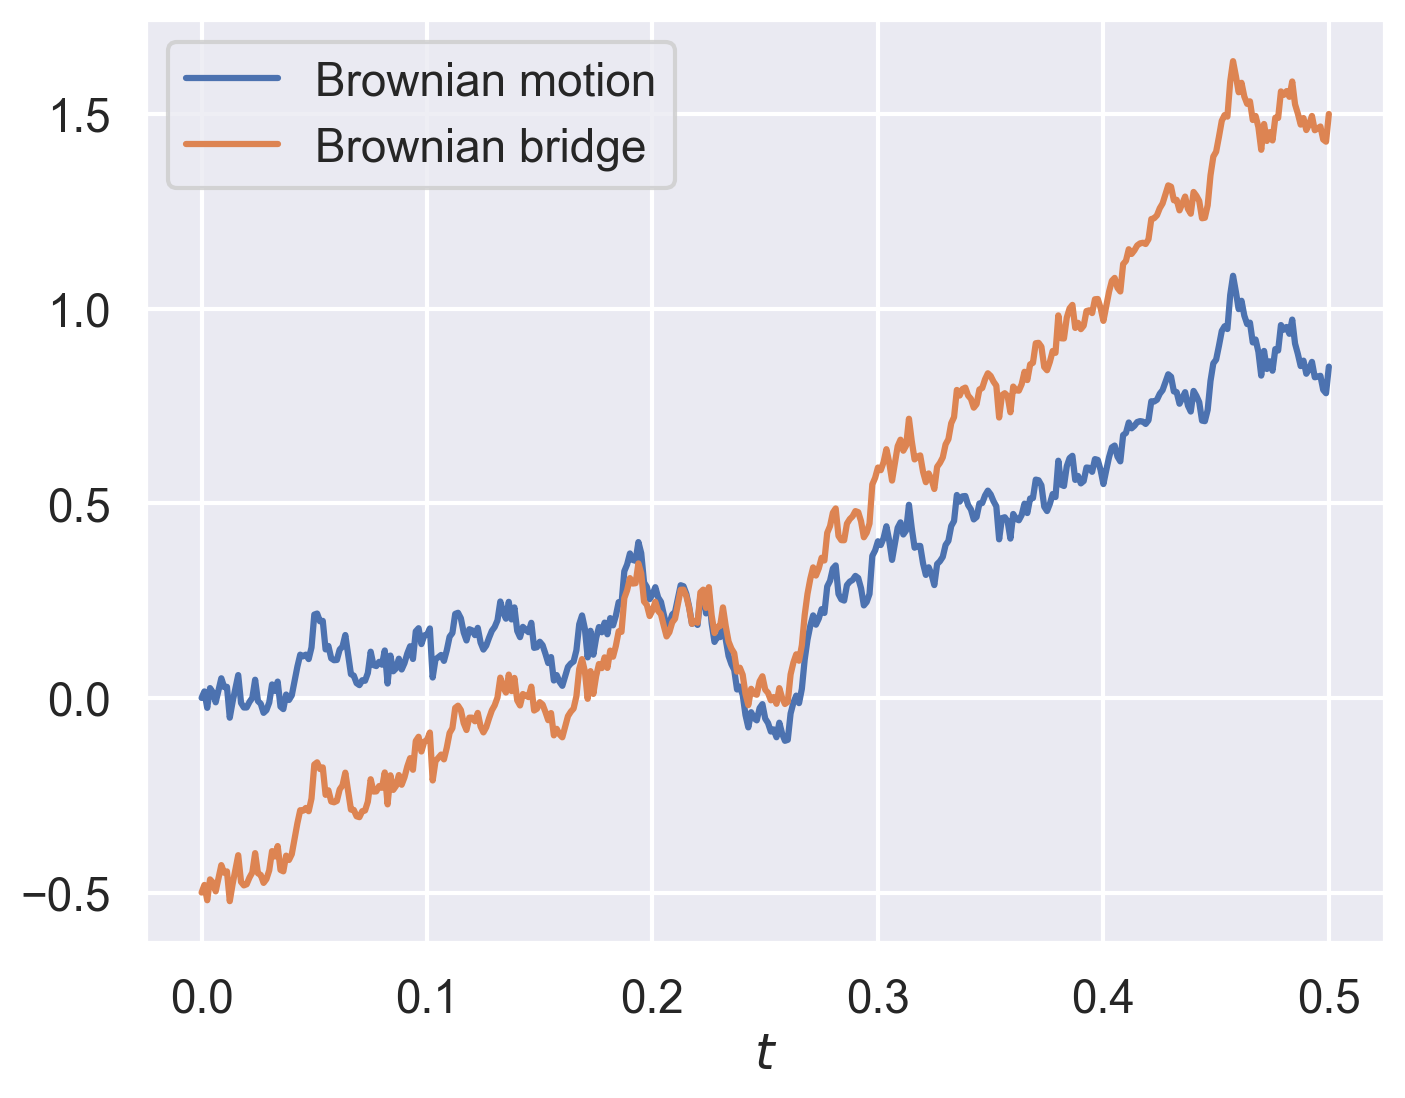

In [35]:
fig, ax = plt.subplots()
ax.plot(tab_t, brownian_paths[:, 0], label="Brownian motion")
ax.plot(tab_t, brownian_bridge_paths[:, 0], label="Brownian bridge")
ax.set_xlabel("$t$")
ax.legend()
plt.show()